*Imports*

In [1]:
import tensorflow_hub as hub
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import requests
from google.colab import files
import io
import time

*Load The Pre-Trained Style Transfer Model*

In [10]:
# Load pre-trained style transfer model
print("Loading model...")
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
print("Model loaded!")

Loading model...
Model loaded!


*Image Processing Functions*

In [3]:
# Helper function to load and preprocess uploaded images
def load_uploaded_image(uploaded_file):
    img_bytes = uploaded_file
    img = tf.image.decode_image(img_bytes, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)[tf.newaxis, :]

    # Resize image to speed up processing. for increasing the quality of image just increase the pixel size... but this take lot more time to build image.
    img = tf.image.resize(img, (1080, 1080))
    return img

*Upload Images*

In [26]:
# Get user input images
# Upload content image (the base image)
print("Upload Your Content Image:")
uploaded_content = files.upload()
content_filename = list(uploaded_content.keys())[0]
content_bytes = uploaded_content[content_filename]
content_image = load_uploaded_image(content_bytes)

# Upload style image (provides the artistic style)
print("Upload Your Style Image:")
uploaded_style = files.upload()
style_filename = list(uploaded_style.keys())[0]
style_bytes = uploaded_style[style_filename]
style_image = load_uploaded_image(style_bytes)

print("Images Loaded Successfully!")

Upload Your Content Image:


Saving 1364px-Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg to 1364px-Van_Gogh_-_Starry_Night_-_Google_Art_Project (2).jpg
Upload Your Style Image:


Saving tubingen.jpg to tubingen (1).jpg
Images Loaded Successfully!


*Display Input Images*

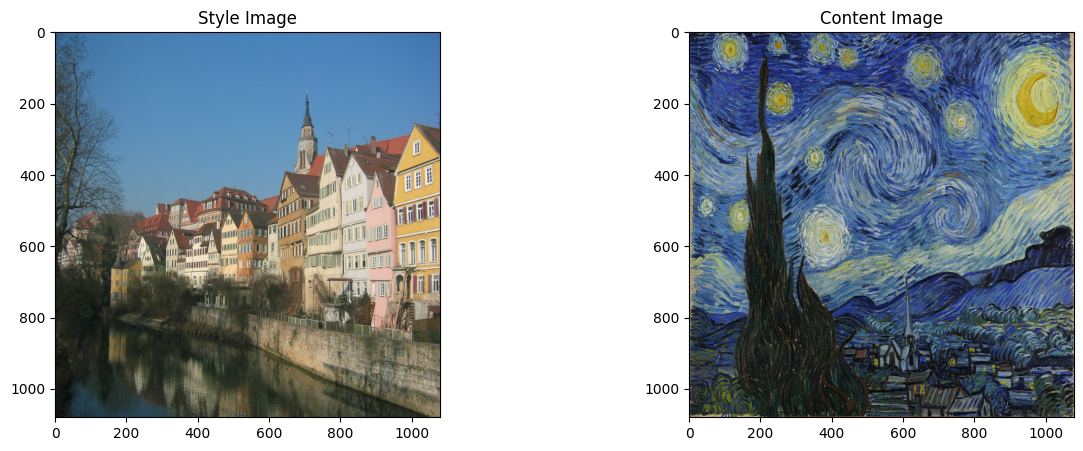

In [27]:
#Display loaded images both side by side
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(np.squeeze(style_image))
plt.title('Style Image')

plt.subplot(1, 2, 2)
plt.imshow(np.squeeze(content_image))
plt.title('Content Image')

plt.show()

*Apply & Style Transfer Function*

Enter style strength (0.0 to 1.0): 1
Applying style transfer with strength 1.0...
Style transfer completed in 19.95 seconds


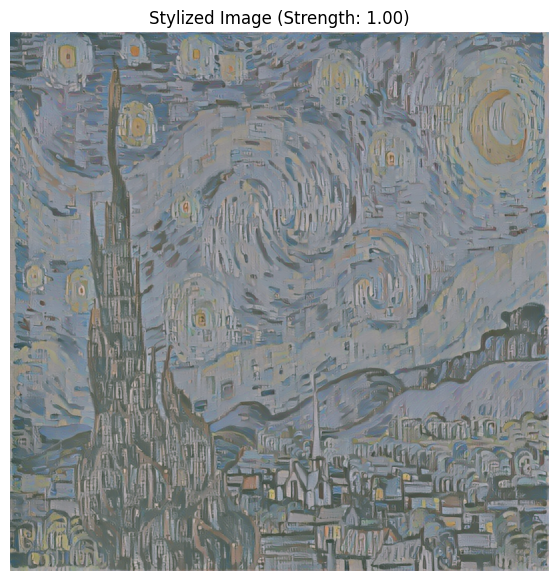

In [28]:
# Apply style with adjustable strength
def fast_style_transfer(strength):
    print(f"Applying style transfer with strength {strength}...")
    start_time = time.time()

    # Generate stylized image (this is the most important & time-consuming part)
    stylized = model(content_image, style_image)[0]

    # Blend between content and stylized image based on strength
    if strength <= 1:
        blended = content_image * (1 - strength) + stylized * strength
        result = blended
    else:
        result = stylized

    elapsed = time.time() - start_time
    print(f"Style transfer completed in {elapsed:.2f} seconds")
    return result

# Get user input for style strength
strength = float(input("Enter style strength (0.0 to 1.0): ")) #Input strength like "0.2, 0.5, 0.8..."

# Apply style transfer and display result
stylized_image = fast_style_transfer(strength)

plt.figure(figsize=(7, 7))
plt.imshow(np.squeeze(stylized_image))
plt.title(f'Stylized Image (Strength: {strength:.2f})')
plt.axis('off')
plt.show()

*Save and Download Result*

In [25]:
# Save and download the stylized image
save_option = input("Do you want to save this image? (yes/no): ")
if save_option.lower() == "yes":
    # Convert to image format and save
    from PIL import Image
    image_np = np.array(stylized_image[0] * 255, dtype=np.uint8)
    image_pil = Image.fromarray(image_np)
    filename = f"stylized_{strength:.2f}.png"
    image_pil.save(filename)

    # Download to your computer
    files.download(filename)
    print(f"Image saved as {filename}")

Do you want to save this image? (yes/no): yes


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Image saved as stylized_0.20.png
